In [1]:
import re
import nltk
import contractions
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
import emoji
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_colwidth', 100)  # Atur panjang teks kolom menjadi 100 karakter

In [3]:
df = pd.read_csv('data/datasets_reviews_augmented.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24603 entries, 0 to 24602
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   content    24603 non-null  object 
 1   score      20098 non-null  float64
 2   sentiment  24603 non-null  object 
dtypes: float64(1), object(2)
memory usage: 576.8+ KB


In [5]:
df.head()

,content,score,sentiment
0,I like this app it's really helpful and it's easy to use and have a lot of features that can be ...,5.0,positive
1,absolute beast.,5.0,positive
2,not fully good once start using it 😕,1.0,negative
3,"all time good app , it's great piece of mind 😉",5.0,positive
4,amazing apps. I love using this but it's hard to save long conversations. could deep seek team a...,4.0,positive


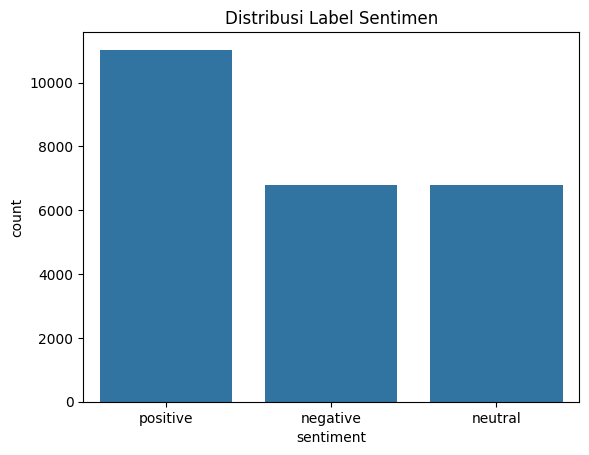

In [6]:
sns.countplot(x=df["sentiment"])
plt.title("Distribusi Label Sentimen")
plt.show()

In [7]:
df['sentiment'].value_counts()

sentiment
positive    11033
negative     6785
neutral      6785
Name: count, dtype: int64

In [8]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to c:\File -File\python\Data
[nltk_data]     Science\DBS\Dicoding_Analisis_Sentimen\model-
[nltk_data]     env\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to c:\File -File\python\Data
[nltk_data]     Science\DBS\Dicoding_Analisis_Sentimen\model-
[nltk_data]     env\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to c:\File -File\python\Data
[nltk_data]     Science\DBS\Dicoding_Analisis_Sentimen\model-
[nltk_data]     env\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [10]:
stop_words.discard("not")

In [11]:
print("not" in stop_words)  

False


In [12]:
def remove_emojis(text):
    return emoji.replace_emoji(text, "")  # Menghapus emoji tanpa mengganti dengan teks lain

def preprocess_text(text):
    # 1. Expand contractions
    text = contractions.fix(text)
    
    # 2. Lowercasing
    text = text.lower()
    
    # 3. Menghapus emoji
    text = remove_emojis(text)
    
    # 4. Menghapus URL, HTML tags, angka, tanda baca, dan karakter spesial
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Hapus URL
    text = re.sub(r'<.*?>', '', text)  # Hapus HTML tags
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # Hapus tanda baca
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Hapus karakter spesial
    
    # 5. Tokenisasi
    tokens = word_tokenize(text)
    
    # 6. Stopwords removal dan lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return " ".join(tokens)

In [13]:
df['cleaned_content'] = df['content'].apply(preprocess_text)

In [14]:
sentiment_mapping = {
    'positive': 2,
    'neutral': 1,
    'negative': 0
}

In [15]:
df['sentiment'] = df['sentiment'].map(sentiment_mapping)

In [16]:
df.head()

,content,score,sentiment,cleaned_content
0,I like this app it's really helpful and it's easy to use and have a lot of features that can be ...,5.0,2,like app really helpful easy use lot feature helpful study give five star recommend using app
1,absolute beast.,5.0,2,absolute beast
2,not fully good once start using it 😕,1.0,0,not fully good start using
3,"all time good app , it's great piece of mind 😉",5.0,2,time good app great piece mind
4,amazing apps. I love using this but it's hard to save long conversations. could deep seek team a...,4.0,2,amazing apps love using hard save long conversation could deep seek team add chat history sync a...


In [17]:
final_df = df[['cleaned_content', 'sentiment']]

In [19]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24603 entries, 0 to 24602
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cleaned_content  24603 non-null  object
 1   sentiment        24603 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 384.6+ KB


In [20]:
final_df.to_csv('data/datasets_reviews_clean.csv', index=False)

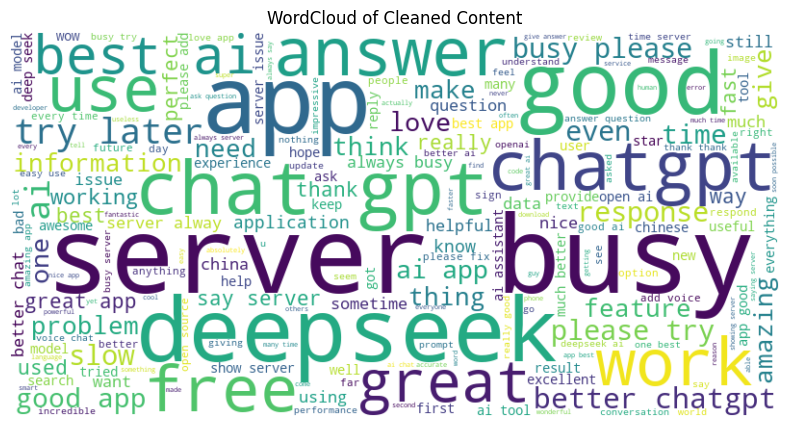

In [23]:
from wordcloud import WordCloud

# Gabungkan semua teks dalam kolom 'cleaned_content'
all_text = " ".join(final_df['cleaned_content'])

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Cleaned Content")
plt.show()